# Filtros FIR Pasa Altas

### Diseño con ventanas cuadradas

### Importar bibliotecas y definir funciones

In [3]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal

In [4]:
def firdesign(N, fc, sr, ftype='low',info=False):
    ft = fc/float(sr)
    M  = int( N+1 )
    tk = np.arange(M) - M/2
    
    tk[M/2] = -1
    
    if 'low' in ftype:
        sinc      = np.sin(2*np.pi*ft*tk)/(np.pi*tk)
        sinc[M/2] = 2*ft
        tk[M/2]   = 0
    
    elif 'high' in ftype:
        sinc      = -np.sin(2*np.pi*ft*tk)/(np.pi*tk)
        sinc[M/2] = 1-2*ft
        tk[M/2]   = 0
    
    else:
        print 'No se especifico tipo de filtro'
        sinc = np.zeros(tk.shape[0])
        
    if info:
        print tk,M
        plt.plot(ft*tk,sinc,'-o',markersize=9,linewidth=3)
        plt.grid(True)
        
        plt.show()
    return sinc

In [6]:
def freq_hz(S,sr):
    w, h = signal.freqz(S)
    H    = 20*np.log10( np.abs(h) )
    W    = np.angle  (h)
    W    = np.unwrap (W)
    W    = np.degrees(W)
    w    = np.linspace(0,sr/2,H.shape[0] )
    
    return w, W, H

### Inicialización de parámetros

In [7]:
N  = 31
M  = N+1
fc = 45
sr = 200

### Calcular coeficientes de filtros pasa altas y pasa bajas

In [8]:
cl_fir = firdesign(N,fc,sr, info=False)
ch_fir = firdesign(N,fc,sr, ftype='high', info=False)

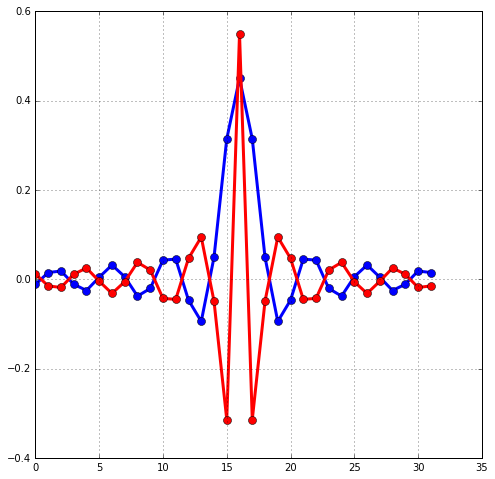

In [9]:
plt.figure(figsize=(8,8))
plt.plot(cl_fir,'-bo',markersize=8,linewidth=3)
plt.plot(ch_fir,'-ro',markersize=8,linewidth=3)
plt.grid(True)
plt.show()

### Respuesta en frecuencia de los filtros

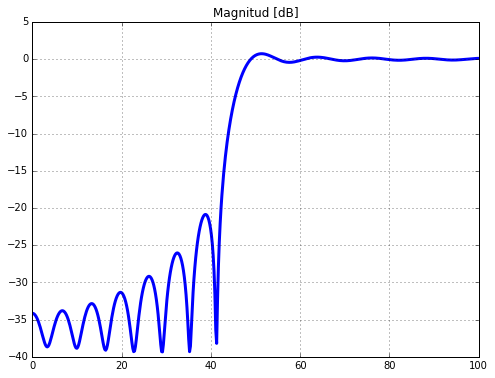

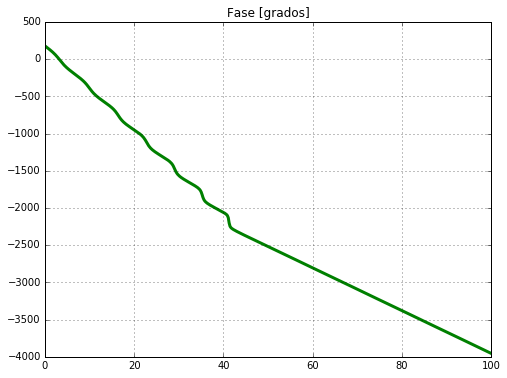

In [10]:
w,w_hz,h_hz = freq_hz(ch_fir,sr)

plt.figure( figsize=(8,6) )
plt.title('Magnitud [dB]')
plt.grid(True)
plt.plot( w,h_hz,'b',linewidth=3 )

plt.figure( figsize=(8,6) )
plt.title('Fase [grados]')
plt.plot( w,w_hz,'g',linewidth=3 )
plt.grid(True)
plt.show()


### Diseño con ventana Hamming

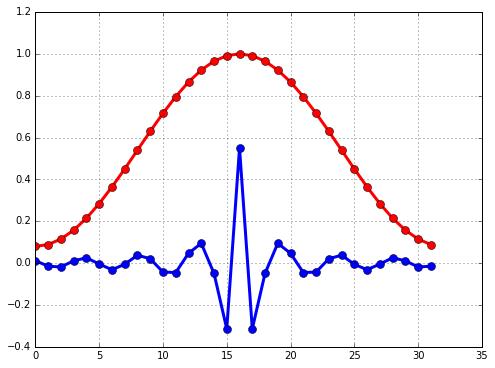

In [11]:
tk   = np.arange(N+1)
hamm = .54 - .46*np.cos( 2*np.pi*tk/float(M) )

plt.figure(figsize=(8,6))
plt.plot(ch_fir,'-bo',linewidth=3,markersize=8)
plt.plot(hamm  ,'-ro',linewidth=3,markersize=8)
plt.grid(True)
plt.show()


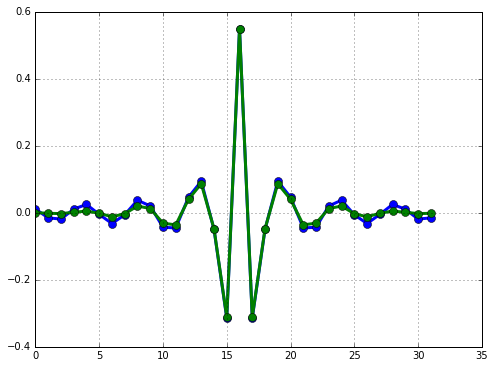

In [12]:
W_fir = ch_fir*hamm

plt.figure(figsize=(8,6))
plt.plot(ch_fir,'-bo',linewidth=3,markersize=8)
plt.plot(W_fir ,'-go',linewidth=3,markersize=8)
plt.grid(True)
plt.show()


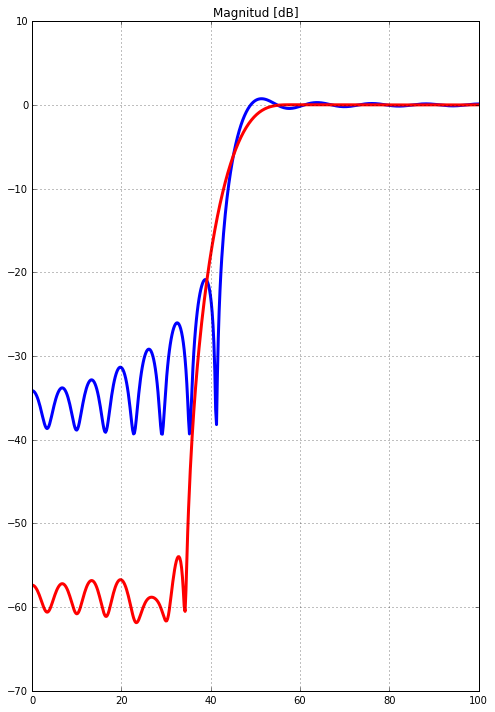

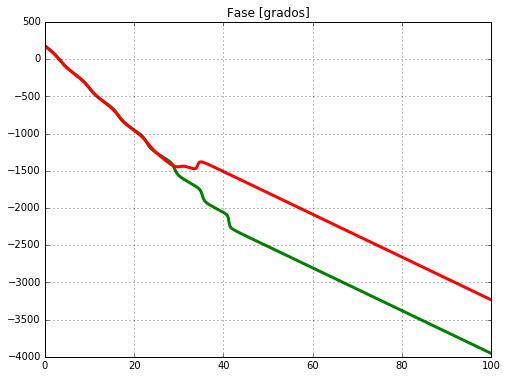

In [13]:
w ,w_hz ,h_hz  = freq_hz(ch_fir,sr)
wW,w_hzW,h_hzW = freq_hz( W_fir,sr)


plt.figure( figsize=(8,12) )
plt.title('Magnitud [dB]')
plt.grid(True)
plt.plot( w ,h_hz ,'b',linewidth=3 )
plt.plot( wW,h_hzW,'r',linewidth=3 )

plt.figure( figsize=(8,6) )
plt.title('Fase [grados]')
plt.plot( w ,w_hz ,'g',linewidth=3 )
plt.plot( wW,w_hzW,'r',linewidth=3 )
plt.grid(True)
plt.show()
